Undirected Graph Creation

In [8]:
import networkx as nx

# Undirected Graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]


Network Visualization

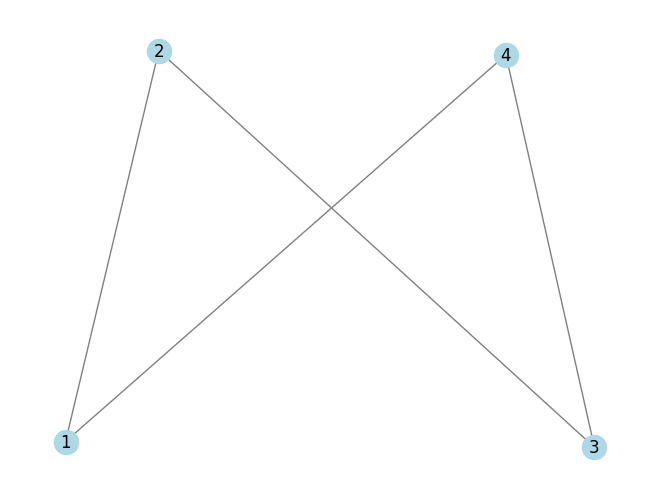

In [4]:
import matplotlib.pyplot as plt

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray")
plt.show()

Centrality Measures

In [5]:
degree_centrality = nx.degree_centrality(G)
print(degree_centrality)

{1: 0.6666666666666666, 2: 0.6666666666666666, 3: 0.6666666666666666, 4: 0.6666666666666666}


In [6]:
betweenness = nx.betweenness_centrality(G)
print(betweenness)

{1: 0.16666666666666666, 2: 0.16666666666666666, 3: 0.16666666666666666, 4: 0.16666666666666666}


Community Detection

In [7]:
from networkx.algorithms import community

communities = community.label_propagation_communities(G)
for i, c in enumerate(communities):
    print(f"Community {i + 1}: {c}")

Community 1: {1, 2, 3, 4}


Shortest Path Computation

In [8]:
path = nx.shortest_path(G, source=1, target=3)
print("Shortest path between 1 and 3:", path)

Shortest path between 1 and 3: [1, 2, 3]


Clique Detection

In [9]:
cliques = list(nx.find_cliques(G))
print("Cliques in the network:", cliques)

Cliques in the network: [[1, 2], [1, 4], [3, 2], [3, 4]]


Network Properties

In [11]:
clustering = nx.clustering(G)
print(clustering)

{1: 0, 2: 0, 3: 0, 4: 0}


In [12]:
diam = nx.diameter(G)
print("Network diameter:", diam)

Network diameter: 2


Reading Edge Lists (from Data)

In [3]:
# Use a dataset you have access to in place of "facebook_comined.txt".
G_fb = nx.read_edgelist("facebook_combined.txt", nodetype=int)

# print(nx.info(G_fb))  # networkx.info has been deprecated, using attributes directly to get a summary
print(f"Number of nodes: {len(G_fb.nodes)}")
print(f"Number of edges: {len(G_fb.edges)}")
print(f"Average degree: {sum(dict(G_fb.degree).values()) / len(G_fb.nodes)}")

print("Summary:", G_fb)

Number of nodes: 4039
Number of edges: 88234
Average degree: 43.69101262688784
Summary: Graph with 4039 nodes and 88234 edges


Visualize the network such that the node color varies with Degree and node size with Betweenness Centrality

(np.float64(-0.8222302897901157),
 np.float64(0.8724084068901238),
 np.float64(-0.8819141044033455),
 np.float64(1.178824417160499))

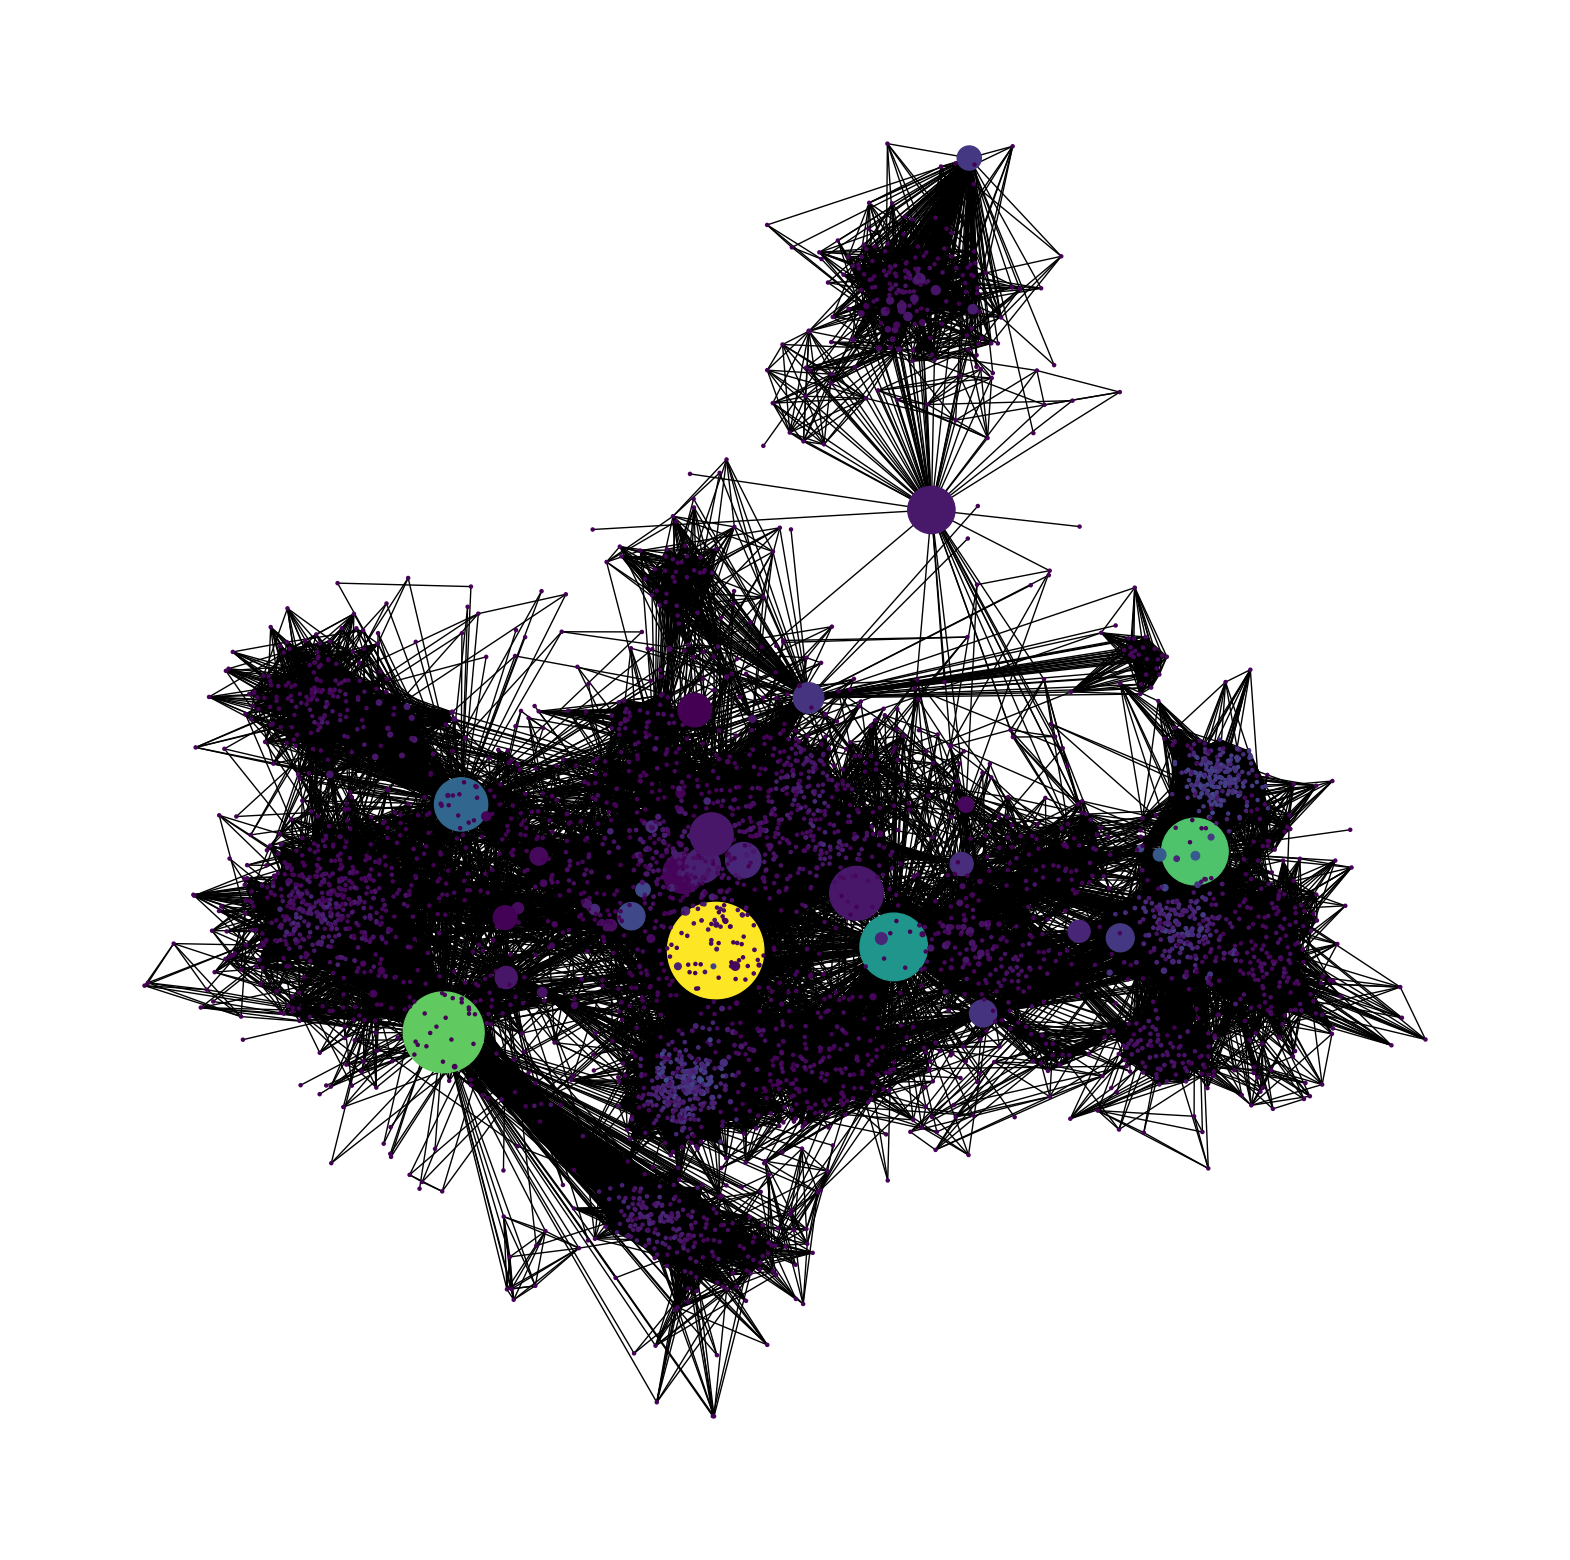

In [7]:
import matplotlib.pyplot as plt

nodes_pos = nx.spring_layout(G_fb)
bet_cent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)
node_color = [20000.0 * G_fb.degree(v) for v in G_fb]
node_size = [v * 10000 for v in bet_cent.values()]
plt.figure(figsize=(20, 20))
nx.draw_networkx(
    G_fb, pos=nodes_pos, with_labels=False, node_color=node_color, node_size=node_size
)
plt.axis("off")